# Productiefouten batterijen

### Setup

### Opgave

In een fabriek worden batterijen voor smartphones gefabriceerd. De vraag naar deze batterijen varieert
nogal sterk. Men heeft het vermoeden dat als de vraag (en dus ook de productie) stijgt, het percentage
ontploffende batterijen ook stijgt (en dus: de kwaliteit daalt onder de werkdruk). Dit wil men verifiëren.
Er wordt een meting gedaan. Iedere dag wordt het aantal geproduceerde batterijen bijgehouden. Als er een
defecte batterij terug wordt gebracht (of er een ontploft), wordt nagegaan op welke dag deze geproduceerd
werd. De data vind je terug in het bestand "batterijen.csv".
De eerste kolom geeft weer hoeveel er geproduceerd werd en de tweede kolom laat zien hoeveel batterijen
er defect waren.

1. Lees het bestand in. Er zijn lijnen met meer dan 2 waarden. Bekijk wat Python hiermee doet als je de
waarden inleest. Verwijder deze lijn uit de data. Er zijn uitschieters in de kolom aantalDefect.
Verwijder deze. Hoeveel rijen hou je nu over?

In [29]:
# read_csv() got an unexpected keyword argument 'error_bad_lines'
# Ik kreeg deze error, dus Ik heb het bestand zelf aangepast in een tekst editor.
import pandas as pd

batterijen = pd.read_csv('data/batterijen.csv', sep=',', decimal='.')

display(batterijen) # 97 rows x 2 columns (Index 0 tot 96)

Q1 = batterijen.aantalDefect.quantile(0.25)
Q3 = batterijen.aantalDefect.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

batterijen = batterijen[(batterijen['aantalDefect'] >= lower_bound) & (batterijen['aantalDefect'] <= upper_bound)]

batterijen.reset_index(drop=True, inplace=True) # De index resetten
display(batterijen) # 94 rows x 2 columns (Index 0 tot 93)

,geproduceerd,aantalDefect
0,1489,21
1,2162,34
2,2472,47
3,3116,77
4,4724,227
...,...,...
92,1959,23
93,1464,9
94,2368,23
95,2873,36


,geproduceerd,aantalDefect
0,1489,21
1,2162,34
2,2472,47
3,3116,77
4,1367,12
...,...,...
89,1959,23
90,1464,9
91,2368,23
92,2873,36


2. Maak een scatterplot van de twee variabelen. Is er een lineair verband?

Text(0.5, 1.0, 'Scatterplot van batterijen')

Text(0.5, 0, 'geproduceerd')

Text(0, 0.5, 'aantalDefect')

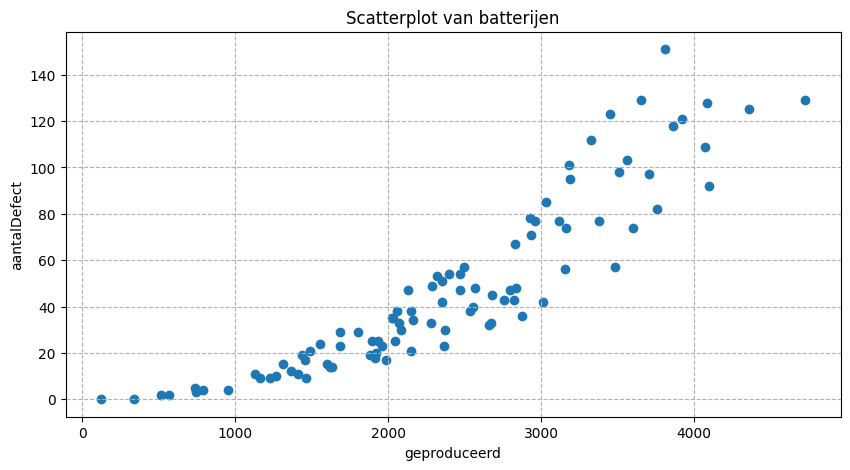

In [30]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(batterijen.geproduceerd, batterijen.aantalDefect)
ax.set_title('Scatterplot van batterijen')
ax.set_xlabel('geproduceerd')
ax.set_ylabel('aantalDefect')
_=ax.grid(linestyle='--')

# Is er een lineair verband? JA
# (Als de R²-waarde van de regressie dicht bij 1 ligt, geeft dit aan dat er een sterke lineaire relatie is tussen de variabelen.)

3. Welke correlatie vind je met de methode van Kendall?

In [31]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

batterijen.corr(method = 'kendall')

,geproduceerd,aantalDefect
geproduceerd,1.000000,0.816143
aantalDefect,0.816143,1.000000


4. Eigenlijk zijn we niet geïnteresseerd in het absolute aantal defecte batterijen, maar wel in het
percentage. Deel dus het aantal defecte door het aantal geproduceerde batterijen. Wat is het
gemiddeld percentage defecte batterijen?

In [32]:
batterijen['percentageDefect'] = batterijen['aantalDefect'] / batterijen['geproduceerd'] * 100
gemiddeldPercentage = batterijen['percentageDefect'].mean()
display(batterijen)
print("Gemiddeld percentage defecte batterijen", round(gemiddeldPercentage, 2))

,geproduceerd,aantalDefect,percentageDefect
0,1489,21,1.410343
1,2162,34,1.572618
2,2472,47,1.901294
3,3116,77,2.471117
4,1367,12,0.877835
...,...,...,...
89,1959,23,1.174068
90,1464,9,0.614754
91,2368,23,0.971284
92,2873,36,1.253046


Gemiddeld percentage defecte batterijen 1.71


5. Maak terug een scatterplot met het percentage defecte batterijen. Zie je het verschil met de vorige
grafiek?

Text(0.5, 1.0, 'Scatterplot van batterijen')

Text(0.5, 0, 'geproduceerd')

Text(0, 0.5, 'percentageDefect')

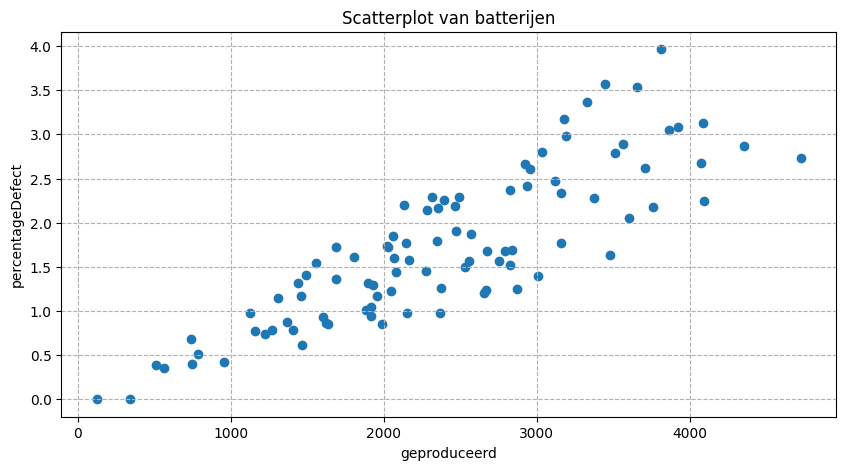

In [33]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(batterijen.geproduceerd, batterijen.percentageDefect)
ax.set_title('Scatterplot van batterijen')
ax.set_xlabel('geproduceerd')
ax.set_ylabel('percentageDefect')
_=ax.grid(linestyle='--')
# Ja

6. Bereken nu de correlatie tussen het aantal geproduceerde batterijen en het percentage defecte
batterijen. Wat besluit je?

In [34]:
correlatie = batterijen['geproduceerd'].corr(batterijen['percentageDefect'])
print("Correlatie tussen aantal geproduceerde batterijen en percentage defecte batterijen:", round(correlatie, 2))

Correlatie tussen aantal geproduceerde batterijen en percentage defecte batterijen: 0.85


7. Wat is de waarde van R²? Wat betekent dit?

In [35]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = batterijen[['percentageDefect']]
y = batterijen.geproduceerd

model.fit(X,y)
y_hat = model.predict(X) # Voorspellingen maken

print(r2_score(y, y_hat)) # Kan je al tijd gebruiken
# Als de R²-waarde van de regressie dicht bij 1 ligt, geeft dit aan dat er een sterke lineaire relatie is tussen de variabelen.

LinearRegression()

0.7238209760492644


8. Teken de regressielijn bij de scatterplot. Wat zijn de waarden voor slope en intercept?


In [56]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

model = LinearRegression()
X = batterijen[['percentageDefect']]
y = batterijen.geproduceerd

model.fit(X, y)

y_hat=model.predict(X) # voor spellingen maken

ax = batterijen.plot(kind='scatter', x='percentageDefect', y='geproduceerd', figsize=(10,5), title='Voorspelling' ,marker='o')
ax.plot(batterijen.percentageDefect, y_hat, color='r', label='Voorspelling')
ax.grid(linestyle='--')
_=ax.legend()

slope, intercept, r_value, p_value, std_err = linregress(batterijen['geproduceerd'], batterijen['percentageDefect'])
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.000745759483036815
Intercept: -0.05713301754655231


9. Wat is de standaardschattingsfout? Wat betekent dit?

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = batterijen[['percentageDefect']]
y = batterijen.geproduceerd

model.fit(X, y)

y_hat = model.predict(X) # voor spellingen maken

se = mean_squared_error(y, y_hat,squared=False)
print(se)
# De standaardschattingsfout (standard error) is een maat voor de precisie van de schatting van de regressielijn. Het geeft aan hoeveel de schatting van de afhankelijke variabele kan variëren rond de regressielijn. Hoe kleiner de standaardschattingsfout, hoe nauwkeuriger de schatting van de regressielijn.

LinearRegression()

511.05144098110145


10. Als de productie opgedreven zou worden tot 8.000 batterijen/dag. Hoeveel defecte batterijen zou je
dan verwachten?

In [61]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(batterijen['geproduceerd'], batterijen['percentageDefect'])
print("Slope:", slope)
print("Intercept:", intercept)

defect = slope * 8000 - intercept

print("Defect:", defect)

Slope: 0.000745759483036815
Intercept: -0.05713301754655231
Defect: 6.0232088818410725


11. Hoeveel batterijen kan de fabriek per dag produceren zodat er hoogstens 1 procent defect is?

In [65]:
maxProd = (0.01 - intercept) / slope
print("Maximale productiecapaciteit met hoogstens 1% defect: ", maxProd)
# Dit betekent dat de fabriek maximaal 90 batterijen per dag kan produceren met een defectpercentage van hoogstens 1%.

Maximale productiecapaciteit met hoogstens 1% defect:  90.01966327424928
